<a href="https://colab.research.google.com/github/maskot1977/tmd2020/blob/main/tmd2020_1_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKitのインストール

In [ ]:
# RDKit installer のインストール
!pip install git+https://github.com/maskot1977/rdkit_installer.git

# RDKitのインストール
from rdkit_installer import install
install.from_miniconda()

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-szukcd29
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-szukcd29
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=2850 sha256=a165798173e5d48eba2fafa44857f241746813ed4f328faa14862ade4abbd19b
  Stored in directory: /tmp/pip-ephem-wheel-cache-eh3o38ie/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


# 化合物データのダウンロード

In [ ]:
import urllib.request

# 化合物データのダウンロード
url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7f9eac91ecf8>)

# pandasのインポートとデータ読み込み

In [ ]:
import pandas as pd

# csvからのデータ読み込み
df = pd.read_csv('data_1.csv')
df

,PCCDB-ID,Open Babel SMILES,HOMO-LUMO gap,HOMO energy,LUMO energy,Dipole moment,Excitation energy (1st),Oscillator strength (1st),Excitation energy (2nd),Oscillator strength (2nd),Excitation energy (3rd),Oscillator strength (3rd),Excitation energy (4th),Oscillator strength (4th),Num. of H bond acceptor,Num. of H bond donor,TPSA,logP,Molecular refractivity,Melting point
0,15493,CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C,5.064,-5.440,-0.376,3.07,4.378,0.1218,4.792,0.0021,4.912,0.0125,5.056,NaN,3.0,0.0,23.55,2.204,76.26,43.79
1,20139,OCc1c(C)cc(cc1C)C,6.041,-6.212,-0.171,1.69,4.995,0.0059,5.425,0.1014,5.859,0.0070,5.924,NaN,1.0,1.0,20.23,2.104,47.47,40.29
2,7039,OCc1cc(C)cc(c1O)CO,5.576,-5.742,-0.166,4.50,4.556,0.0443,5.059,0.0047,5.419,0.0096,5.583,NaN,3.0,3.0,60.69,0.685,45.69,95.04
3,18597,Oc1ccc(c(c1)C)C(C)C,5.837,-5.687,0.150,1.18,4.910,0.0316,5.027,0.0001,5.475,0.0037,5.608,NaN,1.0,1.0,20.23,2.824,48.01,51.64
4,23204,C/C/1=C\CC(C)(C)/C=C/C/C(=C\CC1)/C,6.229,-5.782,0.446,0.12,5.263,0.0250,5.411,0.0053,5.557,0.0087,5.641,NaN,0.0,0.0,0.00,5.035,70.42,44.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,12787,Oc1cc(O)c(c(c1O)C)O,5.124,-4.797,0.327,0.40,3.932,0.0000,4.237,0.0000,4.453,0.0512,4.457,NaN,4.0,4.0,80.92,0.817,39.50,171.05
629,3840,OCc1occ(c(=O)c1)O,5.154,-6.376,-1.222,3.31,3.880,0.0000,4.801,0.1048,5.141,0.0003,5.335,NaN,4.0,2.0,70.67,-0.162,33.13,101.42
630,675,Cc1cc2[nH]cnc2cc1C,5.625,-5.802,-0.177,3.34,4.834,0.0820,5.129,0.0907,5.167,0.0013,5.260,NaN,1.0,1.0,28.68,2.180,46.03,120.11
631,18598,CC(c1cccc(c1O)C)C,5.984,-5.755,0.229,1.67,5.030,0.0381,5.059,0.0018,5.625,0.0029,5.670,NaN,1.0,1.0,20.23,2.824,48.01,51.64


# RDKitを使った化学フォーマット変換

参考記事：https://rdkit.org/docs_jp/Getting_Started_with_RDKit_in_Python_jp.html

In [ ]:
# １つめのSMILES
smile = df['Open Babel SMILES'][0]
smile

'CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C'

In [ ]:
from rdkit import Chem

# SMILES を RDKit Mol に変換
mol = Chem.MolFromSmiles(smile)
mol

In [ ]:
# 名前をつける
mol.SetProp("_Name", "This is an amazing molecule.")

# molファイル形式に変換
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    7.7286   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0130   -2.5242    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# InChI に変換
inchi = Chem.MolToInchi(mol)
inchi

'InChI=1S/C14H24N2O/c1-11-9-12(2)14(17)16(13(3)10-11)8-6-7-15(4)5/h9-10,12H,6-8H2,1-5H3/t12-/m0/s1'

In [ ]:
# 水素原子を明記する
mol = Chem.AddHs(mol)
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 41 41  0  0  0  0  0  0  0  0999 V2000
    8.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7286    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7103   -1.9715    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# 水素原子を省略する
mol = Chem.RemoveHs(mol)
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    7.7286   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0130   -2.5242    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# ファイルに出力する
filename = 'amazing.mol'
print(Chem.MolToMolBlock(mol), file=open(filename, 'w+'))

# 描画

## １分子の描画

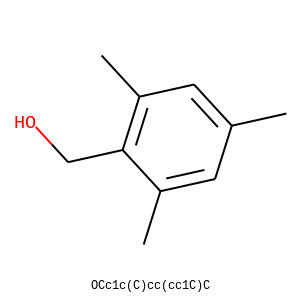

In [ ]:
from rdkit.Chem import Draw

smile = df['Open Babel SMILES'][1]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [ ]:
# ファイルに出力する
filename = 'amazing.png'
Chem.Draw.MolToFile(mol, filename, legend=mol.GetProp("_Name"))

## 構造式描画をもっと詳しく

参考記事： https://future-chem.com/rdkit-2ddraw-svg/

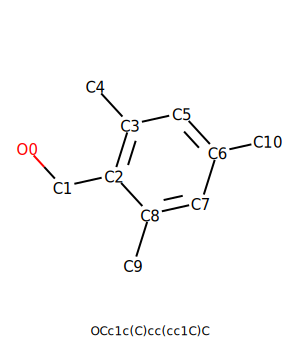

In [ ]:
# どの原子にどの番号がついているか表示したい
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

view = rdMolDraw2D.MolDraw2DSVG(300,350)
view.SetFontSize(0.9 * view.FontSize())
tm = rdMolDraw2D.PrepareMolForDrawing(mol)

option = view.drawOptions()
for atomidx, atom in enumerate(mol.GetAtoms()):
    symbol = mol.GetAtomWithIdx(atomidx).GetSymbol()
    option.atomLabels[atomidx] = symbol + str(atomidx)

view.DrawMolecule(tm, legend=mol.GetProp("_Name"))
view.FinishDrawing()
# 描画
svg = view.GetDrawingText()
SVG(svg)

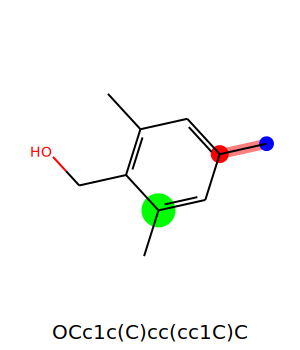

In [ ]:
# 指定した原子をハイライトしたい
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

colors = {6: (1,0,0), 8: (0,1,0), 10: (0, 0, 1)}
radii = {6: 0.25, 8: 0.50, 10: 0.2}

view = rdMolDraw2D.MolDraw2DSVG(300,350)
view.SetFontSize(0.9 * view.FontSize())
tm = rdMolDraw2D.PrepareMolForDrawing(mol)
option = view.drawOptions()
option.multipleBondOffset=0.07
option.padding=0.11
option.legendFontSize=20
view.DrawMolecule(tm,
                  highlightAtoms=colors.keys(),
                  highlightAtomColors=colors,
                  highlightAtomRadii=radii,
                  legend=mol.GetProp("_Name")
                  )
view.FinishDrawing()
# 描画
svg = view.GetDrawingText()
SVG(svg)

## 複数分子の描画

In [ ]:
mols = [] # 複数の RDKit Mol を格納するリスト
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile) # SMILES　を　RDKit Mol　に変換
    mol.SetProp("_Name", str(id)) # 名前をつける
    mols.append(mol) # リストに格納する

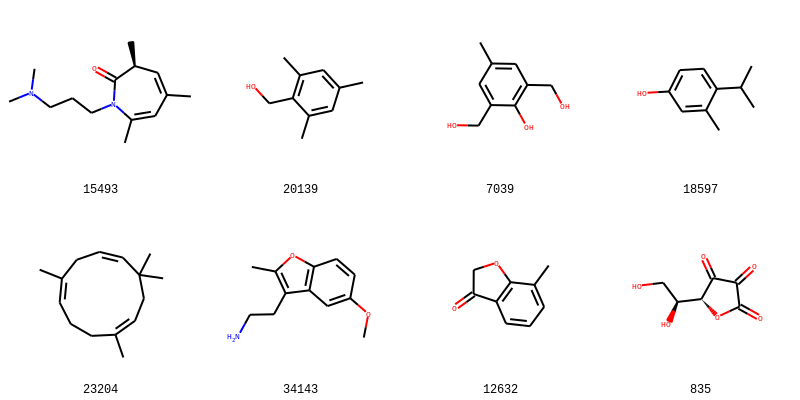

In [ ]:
x_start = 0 # 表示したい最初の化合物
x_end = 8 # 表示したい最後の化合物の次
Draw.MolsToGridImage(
    mols[x_start:x_end], # スライスで範囲を指定
    molsPerRow=4, # 列の数
    subImgSize=(200,200), # 画像サイズ
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]] # 注釈
             )

In [ ]:
# ファイルに出力
img = Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=4,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )
img.save('amazing_grid.png')

# 電荷の中和

[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-] => N[C@@H](Cc1c[nH]cn1)C(=O)O


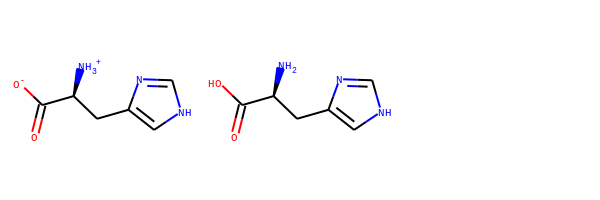

In [ ]:
from rdkit.Chem import MolStandardize

uc = MolStandardize.charge.Uncharger()

smile = "[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-]"
before = Chem.MolFromSmiles(smile)
after = uc.uncharge(before)
smile2 = Chem.MolToSmiles(after)

print(smile, "=>", smile2)
Draw.MolsToGridImage([before, after])

# 脱塩

[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-].[Na+].[Cl-] => [NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-]


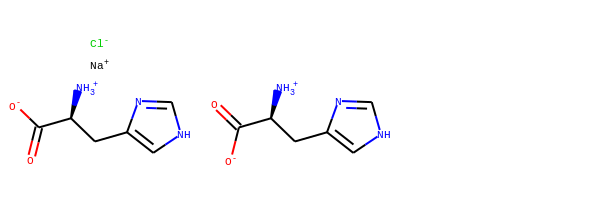

In [ ]:
from rdkit.Chem.SaltRemover import SaltRemover

remover = SaltRemover(defnData="[Cl,Br,Na]")

smile = "[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-].[Na+].[Cl-]"
before = Chem.MolFromSmiles(smile)
after = remover.StripMol(before)
smile2 = Chem.MolToSmiles(after)

print(smile, "=>", smile2)
Draw.MolsToGridImage([before, after])

# 一番大きい分子だけ残す

[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-].[Na+].[Cl-].[O-]C(=O)CCC(=O)[O-] => [NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-]


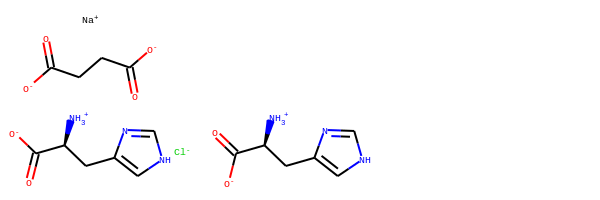

In [ ]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()

smile = "[NH3+][C@@H](Cc1c[nH]cn1)C(=O)[O-].[Na+].[Cl-].[O-]C(=O)CCC(=O)[O-]"
before = Chem.MolFromSmiles(smile)
after = lfc.choose(before)
smile2 = Chem.MolToSmiles(after)

print(smile, "=>", smile2)
Draw.MolsToGridImage([before, after])

# 部分構造検索

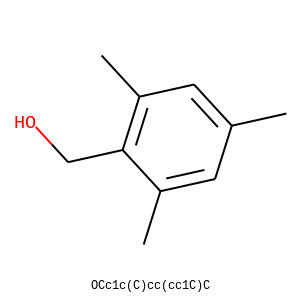

In [ ]:
from rdkit.Chem import Draw

smile = df['Open Babel SMILES'][1]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", "This is an amazing molecule.")

# ノートブック上に描画
Draw.MolToImage(mol, legend=smile)

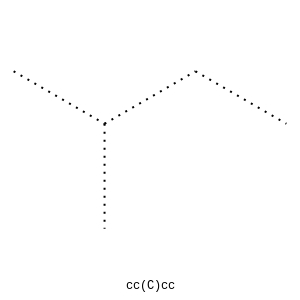

In [ ]:
# 検索したい部分構造パターン
smart = 'cc(C)cc'
patt = Chem.MolFromSmarts(smart)
Draw.MolToImage(patt, legend=smart)

In [ ]:
# 指定した分子中で見つかったパターンのうち最初のもの
mol.GetSubstructMatch(patt)

(2, 3, 4, 5, 6)

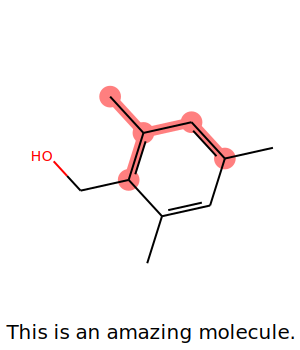

In [ ]:
# 指定した原子をハイライトしたい
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

view = rdMolDraw2D.MolDraw2DSVG(300,350)
view.SetFontSize(0.9 * view.FontSize())
tm = rdMolDraw2D.PrepareMolForDrawing(mol)
option = view.drawOptions()
option.multipleBondOffset=0.07
option.padding=0.11
option.legendFontSize=20
view.DrawMolecule(tm,
                  highlightAtoms=mol.GetSubstructMatch(patt),
                  #highlightAtomColors=colors,
                  #highlightAtomRadii=radii,
                  legend=mol.GetProp("_Name")
                  )
view.FinishDrawing()
# 描画
svg = view.GetDrawingText()
SVG(svg)

In [ ]:
# 指定した分子中で見つかったパターン全部
mol.GetSubstructMatches(patt)

((2, 3, 4, 5, 6),
 (2, 8, 9, 7, 6),
 (3, 2, 1, 8, 7),
 (5, 3, 4, 2, 8),
 (5, 6, 10, 7, 8),
 (7, 6, 10, 5, 3),
 (7, 8, 9, 2, 3),
 (8, 2, 1, 3, 5))

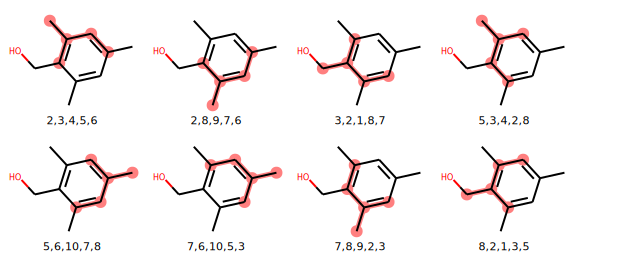

In [ ]:
# 指定した原子をハイライトしたい
matches = mol.GetSubstructMatches(patt)
tm = rdMolDraw2D.PrepareMolForDrawing(mol)
yoko = 640
tate = 280
n_col = 4
n_row = 2
view = rdMolDraw2D.MolDraw2DSVG(
    yoko,
    tate,
    int(yoko / n_col * 0.9),
    int(tate / n_row * 0.9)
    )

view.DrawMolecules([tm]*len(matches),
                   highlightAtoms=matches, 
                   legends=[",".join([str(n) for n in match]) for match in matches]
                   )
# 描画
view.FinishDrawing()
svg = view.GetDrawingText()
SVG(svg)

In [ ]:
mols = []
patt = Chem.MolFromSmarts('c1cccc2c1ccn2')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt): # パターンを含む分子のみ mols に格納する
        mols.append(mol)

len(mols) # 格納された分子の数

20

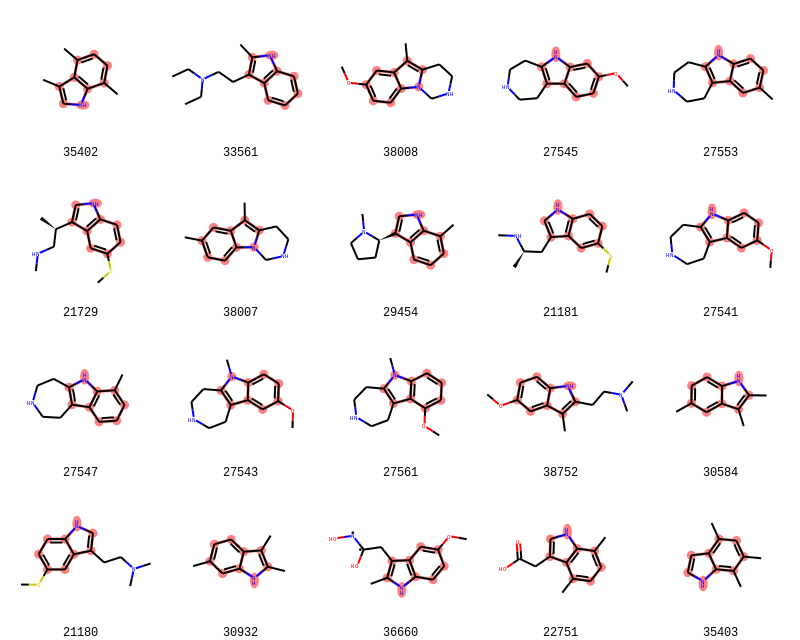

In [ ]:
# 描画
matches = [mol.GetSubstructMatches(patt)[0] for mol in mols]

x_start = 0
x_end = 20
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(160, 160),
    highlightAtomLists=matches[x_start:x_end],
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

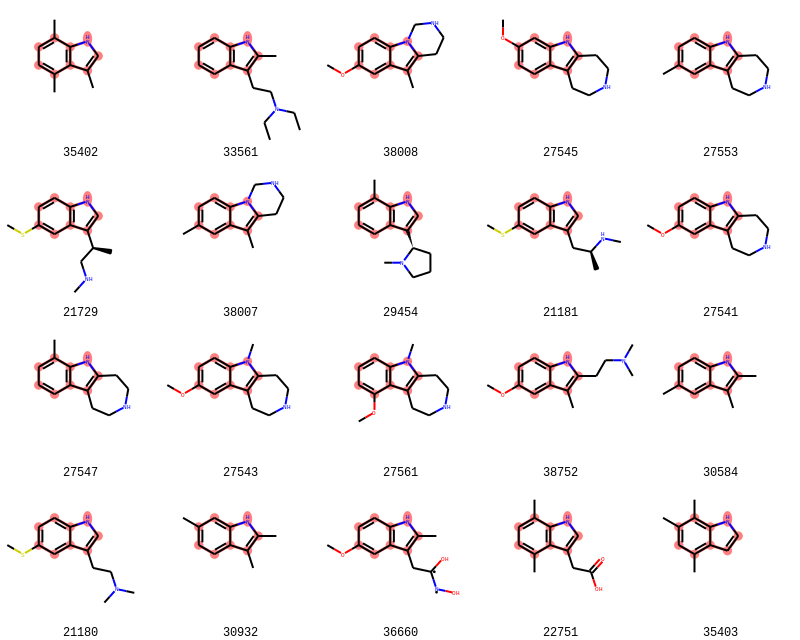

In [ ]:
# 指定した部分構造の向きを揃えて描画したい
from rdkit.Chem import AllChem

mols = []
patt = Chem.MolFromSmarts('c1cccc2c1ccn2')
AllChem.Compute2DCoords(patt) # 部分構造の2D座標を計算する
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt): # パターンを含む分子のみ mols に格納する
        AllChem.GenerateDepictionMatching2DStructure(mol, patt) # 向きを揃える
        mols.append(mol)

matches = [mol.GetSubstructMatches(patt)[0] for mol in mols]

len(mols) # 格納された分子の数

# 描画
x_start = 0
x_end = 20
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(160, 160),
    highlightAtomLists=matches[x_start:x_end],
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

## 部分構造検索の注意点

In [ ]:
ids1 = []
patt = Chem.MolFromSmarts('c1ccccc1') # SMARTSを使ったパターン
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt):
        ids1.append(id)

print(len(ids1))

408


In [ ]:
ids2 = []
patt = Chem.MolFromSmiles('c1ccccc1') # SMILESを使ったパターン
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt):
        ids2.append(id)

print(len(ids2))

407


In [ ]:
set(ids1) - set(ids2) # SMARTSとSMILESで結果が異なることがある

{1384}

COc1cc2c(CO)[nH]ccc2cc1=O


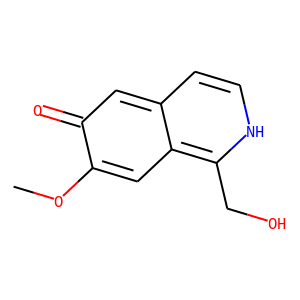

In [ ]:
# 結果が異なる例を表示
smile = list(df[df['PCCDB-ID'] == 1384]['Open Babel SMILES'])[0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

## 部分構造検索における立体化学

4


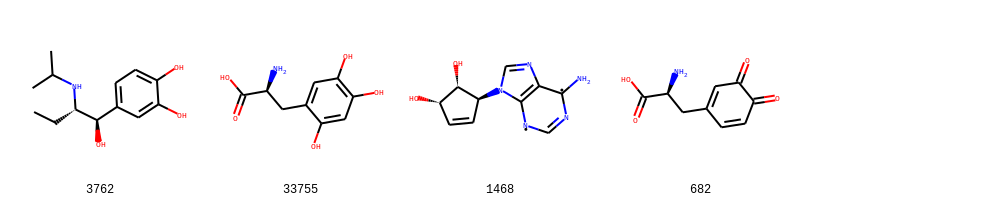

In [ ]:
mols = []
patt = Chem.MolFromSmiles('C[C@H](N)CO')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt, useChirality=True): # useChirality=True
        mols.append(mol)

print(len(mols))

x_start = 0
x_end = 5
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

1


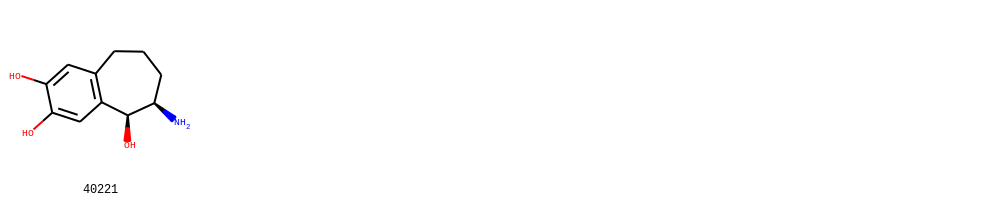

In [ ]:
mols = []
patt = Chem.MolFromSmiles('C[C@@H](N)CO')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt, useChirality=True): # useChirality=True
        mols.append(mol)

print(len(mols))

x_start = 0
x_end = 5
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

# ３D構造の生成

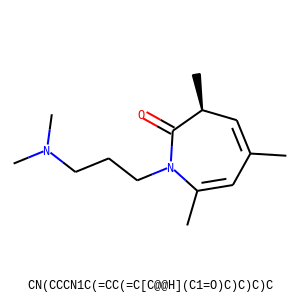

In [ ]:
from rdkit.Chem import Draw

smile = df['Open Babel SMILES'][0]
mol = Chem.MolFromSmiles(smile)
mol.SetProp("_Name", smile)

# ノートブック上に描画
Draw.MolToImage(mol, legend=mol.GetProp("_Name"))

In [ ]:
print(Chem.MolToMolBlock(mol))

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C
     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    7.7286   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0130   -2.5242    0.0000 O   0  0  0  0  0  0  0  0  0

In [ ]:
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
mol = Chem.RemoveHs(mol)
print(Chem.MolToMolBlock(mol))

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -4.6238   -0.5699   -0.8209 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1982    0.1735    0.2806 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0454   -0.1788    0.9788 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8327    0.0869    0.0680 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6391   -0.3014    0.8873 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6295   -0.1187    0.2457 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.1200   -1.2420   -0.4657 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4147   -1.5728   -0.6571 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5970   -0.8399   -0.1697 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6372    0.4672    0.0546 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6276    1.5447   -0.0867 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.2842    1.1510    0.3919 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    2.0347    1.0178 O   0  0  0  0  0  0  0  0  0

# 3Dの描画

参考記事：https://future-chem.com/py3dmol/

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole

view = py3Dmol.view(width=600, height=400, linked=False, viewergrid=(1,1))
view.addModel(Chem.MolToMolBlock(mol), 'sdf', {'keepH': False})
view.setStyle({'stick': {}}, viewer=(0, 0))
#view.setStyle({'sphere': {}}, viewer=(0, 0))
#view.setStyle({'line': {'linewidth': 50}}, viewer=(0,0))
view.setBackgroundColor('#000000', viewer=(0,0))
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
mols = [] # 複数の RDKit Mol を格納するリスト
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile) # SMILES　を　RDKit Mol　に変換
    mol.SetProp("_Name", str(id)) # 名前をつける
    mols.append(mol) # リストに格納する
    
add_mols = []
for m in mols[:6]:
    m_h = Chem.AddHs(m)
    AllChem.EmbedMolecule(m_h, AllChem.ETKDGv2())
    add_mols.append(m_h)
color_scheme = ['cyanCarbon', 'blackCarbon', 'ssPyMOL', 'ssJmol', 'Jmol', 'default']
view = py3Dmol.view(width=680, height=400, viewergrid=(2,3), linked=False)
for (n, (i,j)), c in zip(enumerate([(a,b) for a in range(2) for b in range(3)]), color_scheme):
    mb = Chem.MolToMolBlock(add_mols[n])
    view.addModel(mb, 'sdf', {'keepH': False}, viewer=(i,j))
    view.setStyle({'stick': {'colorscheme': c}}, viewer=(i,j))
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Recap

Recapは、実験室でよく使われる反応を模倣した化学変換のセットを使って、分子を一連の合理的なフラグメントに分解します。

Lewell, X.Q.; Judd, D.B.; Watson, S.P.; Hann, M.M. “RECAP-Retrosynthetic Combinatorial Analysis Procedure: A Powerful New Technique for Identifying Privileged Molecular Fragments with Useful Applications in Combinatorial Chemistry” J. Chem. Inf. Comp. Sci. 38:511-22 (1998).

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


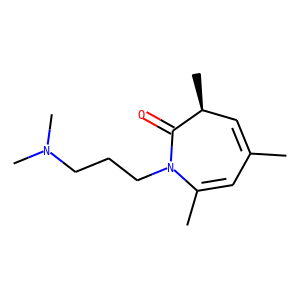

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
from rdkit.Chem import Recap

# Recap アルゴリズムによる化学フラグメント分解
hierarch = Recap.RecapDecompose(mol)
ks = hierarch.children
ks

{'*CCCN(C)C': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7f9ea569b6a0>,
 '*N1C(=O)[C@@H](C)C=C(C)C=C1C': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7f9ea569b080>}

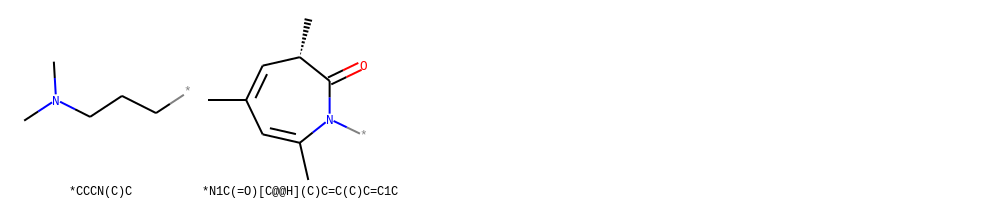

In [ ]:
# 得られたフラグメントの描画
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(k) for k in ks.keys()],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(ks.keys())
             )

# BRICS

BRICSは合成的に利用可能な結合に沿って分子をフラグメント化するもう一つの方法です

Degen, J.; Wegscheid-Gerlach, C.; Zaliani, A; Rarey, M. "On the Art of Compiling and Using ‘Drug-Like’ Chemical Fragment Spaces." ChemMedChem 3:1503–7 (2008).

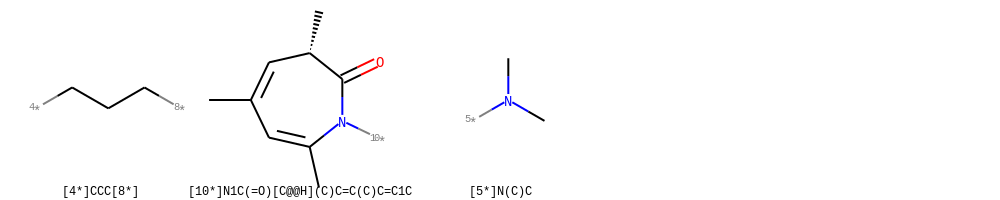

In [ ]:
from rdkit.Chem import BRICS

# BRICS アルゴリズムによる化学フラグメント分解
fragments = BRICS.BRICSDecompose(mol)

# 得られたフラグメントの描画
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(k) for k in list(fragments)],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(fragments)
             )

分子の集合に対して全てのフラグメントのリストを生成することがとても簡単にできます

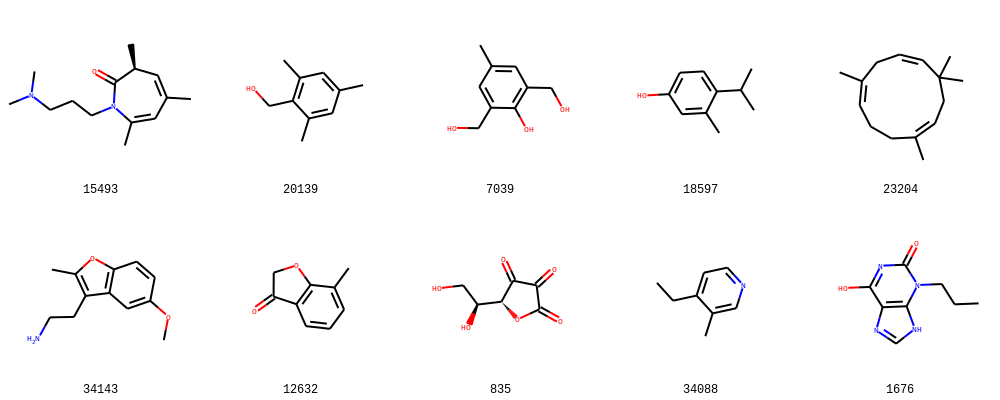

In [ ]:
# フラグメント化したい分子の集合を作る
mols = []
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    mols.append(mol)

x_start = 0
x_end = 10
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

19


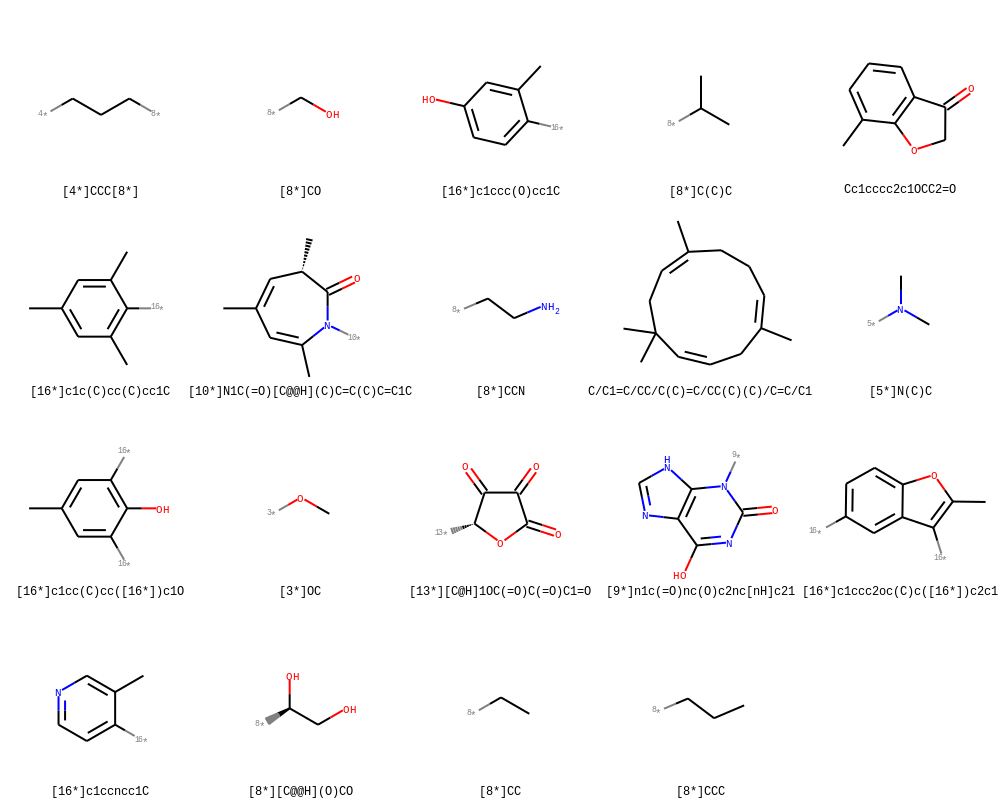

In [ ]:
# 分子の集合から、フラグメントの集合を得る
allfrags=set()
for mol in mols[x_start:x_end]:
    fragment = BRICS.BRICSDecompose(mol)
    allfrags.update(fragment)

print(len(allfrags)) # 得られたフラグメントの数

# フラグメントの集合の描画
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(f) for f in allfrags],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(allfrags)
             )

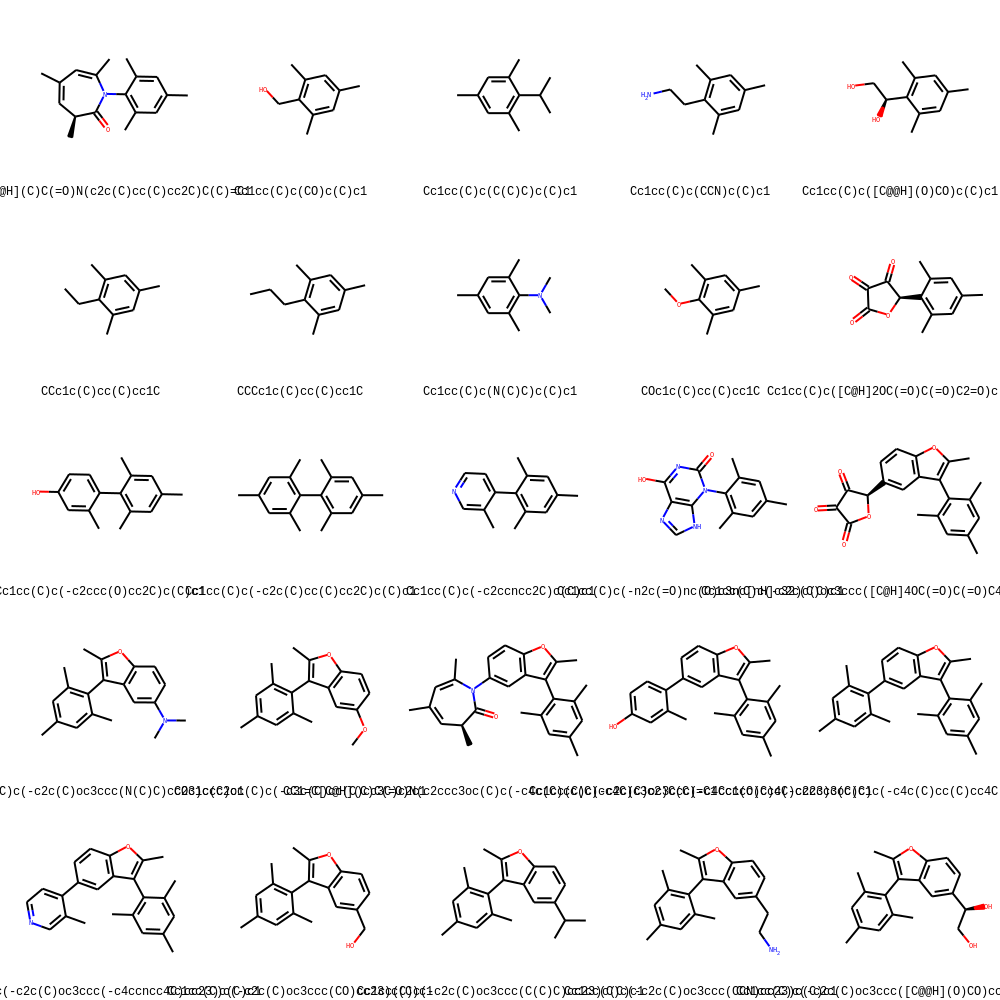

In [ ]:
# フラグメントの集合にBRICSのルールを適用して新しい分子を生成する
fragms = [Chem.MolFromSmiles(x) for x in allfrags]

products = []
for mol in BRICS.BRICSBuild(fragms):
    mol.UpdatePropertyCache(strict=False)
    products.append(mol)
    if len(products) >= 25:
        break

# 得られた新しい分子の描画
Draw.MolsToGridImage(
    products,
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[Chem.MolToSmiles(mol) for mol in products]
             )

# 分子ごとの化学記述子

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


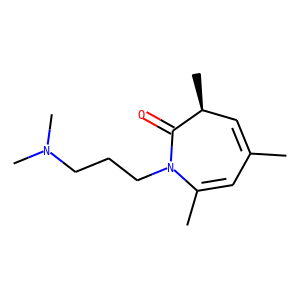

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.TPSA(mol)

23.55

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.MolLogP(mol)

2.2664999999999997

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.MolWt(mol)

236.35899999999998

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.HeavyAtomCount(mol)

17

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.NumHAcceptors(mol)

2

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.NumHDonors(mol)

0

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.NumHeteroatoms(mol)

3

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.NumRotatableBonds(mol)

4

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.RingCount(mol)

1

In [ ]:
from rdkit.Chem import Descriptors
Descriptors.FractionCSP3(mol)

0.6428571428571429

## 計算可能な記述子を列挙してマトリクスを作る

In [ ]:
desc_names = [x[0] for x in Descriptors._descList if x[0]]
print(desc_names)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA'

In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_names)

matrix = []
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    row = []
    row.append(id)
    row.append(smile)
    mol = Chem.MolFromSmiles(smile)
    for d in calc.CalcDescriptors(mol):
        row.append(d)
    matrix.append(row)

desc_df = pd.DataFrame(matrix, columns=["ID", "SMILES"] + desc_names)
desc_df

,ID,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,...,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15493,CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C,12.203893,-0.011059,12.203893,0.011059,0.747310,236.359,212.167,236.188863,96,0,0.232872,-0.315939,0.315939,0.232872,1.352941,2.000000,2.588235,2.692946,342.131373,12.999636,11.656047,11.656047,7.913591,6.243605,6.243605,5.131783,5.131783,3.017810,3.017810,2.172367,2.172367,-1.09,4386.307253,13.972854,6.009622,4.004817,104.779651,9.799819,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20139,OCc1c(C)cc(cc1C)C,8.990151,0.150741,8.990151,0.150741,0.649670,150.221,136.109,150.104465,60,0,0.068649,-0.391660,0.391660,0.068649,1.090909,1.545455,1.909091,3.247713,240.570442,8.430721,7.309021,7.309021,5.147066,3.824482,3.824482,3.035385,3.035385,1.998483,1.998483,1.459315,1.459315,-0.82,255.676668,8.278232,3.054899,1.603412,67.685405,5.106527,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7039,OCc1cc(C)cc(c1O)CO,9.393241,-0.207824,9.393241,0.008704,0.608365,168.192,156.096,168.078644,66,0,0.126112,-0.507200,0.507200,0.126112,1.083333,1.500000,1.833333,3.219755,256.097291,9.137828,6.910555,6.910555,5.685071,3.717870,3.717870,2.748003,2.748003,1.752819,1.752819,1.175315,1.175315,-1.06,499.168482,9.031408,3.559264,1.571153,70.908931,15.319582,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18597,Oc1ccc(c(c1)C)C(C)C,9.119284,0.353611,9.119284,0.353611,0.652274,150.221,136.109,150.104465,60,0,0.115360,-0.507956,0.507956,0.115360,1.272727,1.909091,2.363636,3.092720,251.049732,8.430721,7.256615,7.256615,5.109061,3.905016,3.905016,3.195591,3.195591,1.875392,1.875392,1.307668,1.307668,-0.98,252.107381,8.119800,2.951612,1.732031,67.685405,5.106527,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23204,C/C/1=C\CC(C)(C)/C=C/C/C(=C\CC1)/C,2.401620,0.311389,2.401620,0.311389,0.485103,204.357,180.165,204.187801,84,0,-0.014017,-0.084980,0.084980,0.014017,1.066667,1.800000,2.533333,2.790626,287.160171,11.311555,10.637828,10.637828,6.994800,5.984764,5.984764,5.438827,5.438827,3.016960,3.016960,1.800810,1.800810,-0.78,1710.416432,12.290323,5.344008,5.013262,94.773800,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,12787,Oc1cc(O)c(c(c1O)C)O,8.990463,-0.446481,8.990463,0.057870,0.330838,156.137,148.073,156.042259,60,0,0.163917,-0.504157,0.504157,0.163917,0.909091,1.272727,1.636364,3.455546,266.732315,8.593858,5.866205,5.866205,5.036581,2.971777,2.971777,2.237032,2.237032,1.469088,1.469088,0.762583,0.762583,-1.58,256.346785,7.526157,2.229407,1.022829,62.973280,20.426110,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
629,3840,OCc1oc

# 原子ごとの物理化学的特徴

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


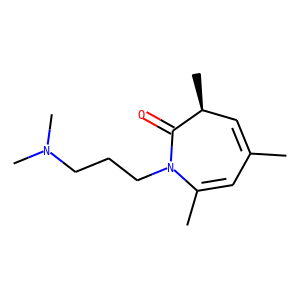

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
from rdkit.Chem import AllChem

AllChem.ComputeGasteigerCharges(mol)
for id, atom in enumerate(mol.GetAtoms()):
    print(id + 1, atom.GetSymbol(), atom.GetProp('_GasteigerCharge'))

1 C -0.0136943963308498
2 N -0.30933200208057476
3 C -0.00078220155210439492
4 C -0.022188692255721464
5 C 0.026681648229412099
6 N -0.31593906761689189
7 C 0.017865227318612249
8 C -0.040193690176393966
9 C -0.052619564463596336
10 C -0.069408079465383604
11 C 0.054212735936674597
12 C 0.23287165212981889
13 O -0.27385394314736827
14 C -0.050057930798772139
15 C -0.040001109239784977
16 C -0.024124461778980061
17 C -0.0136943963308498


In [ ]:
import os
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

for i, feat in enumerate(factory.GetFeaturesForMol(mol)):
    print(i, feat.GetFamily(), feat.GetType(), feat.GetAtomIds())

0 Donor SingleAtomDonor (1,)
1 Donor SingleAtomDonor (5,)
2 Acceptor SingleAtomAcceptor (12,)
3 PosIonizable BasicGroup (1,)
4 Hydrophobe ThreeWayAttach (8,)
5 Hydrophobe ThreeWayAttach (10,)
6 Hydrophobe ChainTwoWayAttach (3,)


## SASA (solvent accessible surface area)

In [ ]:
from rdkit.Chem import rdFreeSASA

mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)

radii = rdFreeSASA.classifyAtoms(mol)
rdFreeSASA.CalcSASA(mol, radii)

357.4292539125824

In [ ]:
atoms = mol.GetAtoms()
for i in range(len(atoms)):
    print(i, atoms[i].GetSymbol(), atoms[i].GetProp("SASA"))

0 C 0.3024448709542521
1 N 6.3500233234601993
2 C 0.4177267441085819
3 C 0.58187229205742719
4 C 0.46871992132182122
5 N 5.791683858303851
6 C 5.5319902464945363
7 C 5.3845092418835989
8 C 5.559229594418472
9 C 4.9376231316000121
10 C 0.97536077390911491
11 C 5.9623892376456453
12 O 13.553839491227274
13 C 0.11958882273680767
14 C 0.41877742362164533
15 C 0.53878466587523866
16 C 0.35666992354252991
17 H 14.666562909246906
18 H 11.619036584047059
19 H 11.608887621042792
20 H 12.53203441301283
21 H 10.074933766464932
22 H 12.655180460041917
23 H 14.31270349899407
24 H 8.8222654629787538
25 H 9.1972534160186896
26 H 12.689971552479342
27 H 11.738133190600511
28 H 15.210309838151169
29 H 14.228756637015733
30 H 13.420574405159405
31 H 13.939053931461277
32 H 15.447738909133188
33 H 12.916635019793492
34 H 14.294516816752594
35 H 13.084759282946267
36 H 12.109380081346155
37 H 11.915709911151948
38 H 9.097611792223816
39 H 10.934997821651711
40 H 13.661013027706817


# 2Dファーマコフォアフィンガープリント

複数の化学的特徴と、フィーチャー間の2Dの(幾何学的、トポロジカル)距離とを合わせることで2Dファーマコフォアを作成できます。

In [ ]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit.Chem.Pharm2D.SigFactory import SigFactory

fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)
sigFactory = SigFactory(featFactory, minPointCount=2, maxPointCount=3)

# 距離をビン分割して、それぞれのファーマコフォアに一意の整数値のIDを割り当てる
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
sigFactory.GetSigSize()

2988

In [ ]:
# 2Dファーマコフォアフィンガープリントの作成
from rdkit.Chem.Pharm2D import Generate
fp = Generate.Gen2DFingerprint(mol, sigFactory)
len(fp) # フィンガープリントの長さ

2988

In [ ]:
fp.GetNumOnBits() # 立っているビットの数

52

In [ ]:
# 立っているビットの内訳
for bit in list(fp.GetOnBits()):
    print(bit, sigFactory.GetBitDescription(bit))

7 Acceptor Donor |0 1|1 0|
8 Acceptor Donor |0 2|2 0|
10 Acceptor Hydrophobe |0 1|1 0|
11 Acceptor Hydrophobe |0 2|2 0|
20 Acceptor PosIonizable |0 2|2 0|
46 Donor Donor |0 1|1 0|
49 Donor Hydrophobe |0 1|1 0|
50 Donor Hydrophobe |0 2|2 0|
58 Donor PosIonizable |0 1|1 0|
63 Hydrophobe Hydrophobe |0 0|0 0|
64 Hydrophobe Hydrophobe |0 1|1 0|
65 Hydrophobe Hydrophobe |0 2|2 0|
73 Hydrophobe PosIonizable |0 1|1 0|
74 Hydrophobe PosIonizable |0 2|2 0|
487 Acceptor Donor Donor |0 2 1|2 0 1|1 1 0|
503 Acceptor Donor Hydrophobe |0 1 1|1 0 1|1 1 0|
506 Acceptor Donor Hydrophobe |0 1 2|1 0 1|2 1 0|
511 Acceptor Donor Hydrophobe |0 2 1|2 0 1|1 1 0|
512 Acceptor Donor Hydrophobe |0 2 1|2 0 2|1 2 0|
578 Acceptor Donor PosIonizable |0 1 2|1 0 1|2 1 0|
622 Acceptor Hydrophobe Hydrophobe |0 1 1|1 0 0|1 0 0|
623 Acceptor Hydrophobe Hydrophobe |0 1 1|1 0 1|1 1 0|
624 Acceptor Hydrophobe Hydrophobe |0 1 1|1 0 2|1 2 0|
630 Acceptor Hydrophobe Hydrophobe |0 2 1|2 0 0|1 0 0|
631 Acceptor Hydrophobe Hydropho

Gobbi & Poppinger 定義の２Dファーマコフォアを用いる

Gobbi, A. & Poppinger, D. "Genetic optimization of combinatorial libraries." Biotechnology and Bioengineering 61:47-54 (1998).

In [ ]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
fp = Generate.Gen2DFingerprint(mol, Gobbi_Pharm2D.factory)
len(fp) # フィンガープリントの長さ

39972

In [ ]:
fp.GetNumOnBits() # 立っているビットの数

53

In [ ]:
# 立っているビットの内訳
for bit in list(fp.GetOnBits()):
    print(bit, Gobbi_Pharm2D.factory.GetBitDescription(bit))

114 BG HA |0 2|2 0|
116 BG HA |0 4|4 0|
135 BG RR |0 2|2 0|
136 BG RR |0 3|3 0|
137 BG RR |0 4|4 0|
138 BG RR |0 5|5 0|
147 HA HA |0 0|0 0|
149 HA HA |0 2|2 0|
151 HA HA |0 4|4 0|
168 HA RR |0 0|0 0|
169 HA RR |0 1|1 0|
170 HA RR |0 2|2 0|
171 HA RR |0 3|3 0|
172 HA RR |0 4|4 0|
173 HA RR |0 5|5 0|
231 RR RR |0 0|0 0|
232 RR RR |0 1|1 0|
23624 BG HA HA |0 4 2|4 0 0|2 0 0|
24533 BG HA RR |0 2 4|2 0 0|4 0 0|
24541 BG HA RR |0 2 5|2 0 1|5 1 0|
24617 BG HA RR |0 4 2|4 0 0|2 0 0|
24625 BG HA RR |0 4 3|4 0 1|3 1 0|
24633 BG HA RR |0 4 4|4 0 2|4 2 0|
24639 BG HA RR |0 4 5|4 0 1|5 1 0|
24640 BG HA RR |0 4 5|4 0 2|5 2 0|
27596 BG RR RR |0 4 2|4 0 0|2 0 0|
27645 BG RR RR |0 5 2|5 0 1|2 1 0|
27651 BG RR RR |0 5 3|5 0 0|3 0 0|
27652 BG RR RR |0 5 3|5 0 1|3 1 0|
27658 BG RR RR |0 5 4|5 0 0|4 0 0|
28589 HA HA HA |0 4 2|4 0 0|2 0 0|
29386 HA HA RR |0 0 1|0 0 1|1 1 0|
29391 HA HA RR |0 0 2|0 0 0|2 0 0|
29392 HA HA RR |0 0 2|0 0 1|2 1 0|
29498 HA HA RR |0 2 4|2 0 0|4 0 0|
29506 HA HA RR |0 2 5|2 0 1|5 

# フィンガープリントを用いた類似分子検索

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


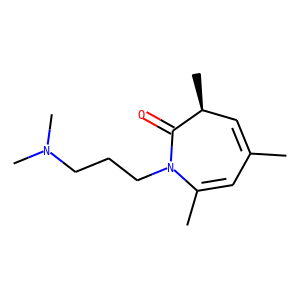

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
query_mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(query_mol)

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Avalon import pyAvalonTools

# フィンガープリントいろいろ
get_fp = lambda mol: MACCSkeys.GenMACCSKeys(mol)
#get_fp = lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
#get_fp = lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useFeatures=True)
#get_fp = lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024)
#get_fp = lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024, useFeatures=True)
#get_fp = lambda mol: Pairs.GetAtomPairFingerprintAsBitVect(mol)
#get_fp = lambda mol: FingerprintMols.FingerprintMol(mol) #Topological Fingerprint
#get_fp = lambda mol: Torsions.GetTopologicalTorsionFingerprintAsIntVect(mol) 
#get_fp = lambda mol: pyAvalonTools.GetAvalonFP(mol)

# 類似性指標もいろいろ
metric = DataStructs.TanimotoSimilarity
#metric = DataStructs.DiceSimilarity
#metric = DataStructs.CosineSimilarity
#metric = DataStructs.SokalSimilarity
#metric = DataStructs.RusselSimilarity
#metric = DataStructs.KulczynskiSimilarity
#metric = DataStructs.McConnaugheySimilarity

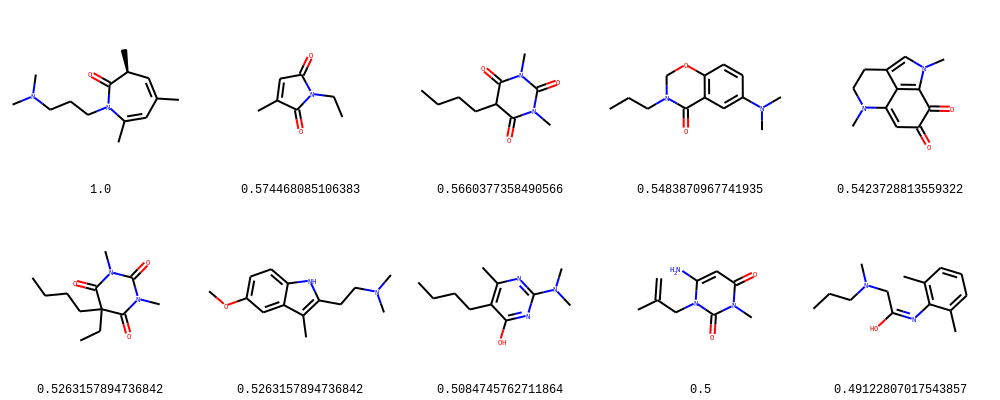

In [ ]:
query_fp = get_fp(query_mol)

mols = []
fps = [] # 複数のリンガープリントを格納するリスト
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile) # SMILES　を　RDKit Mol　に変換
    mol.SetProp("_Name", str(id)) # 名前をつける
    fp = get_fp(mol)
    fps.append(fp) # リストに格納する
    mols.append(mol)

results = []
for i, fp in enumerate(fps):
    results.append([DataStructs.FingerprintSimilarity(query_fp, fp, metric=metric), i])

searched_mols = []
similarity_values = []
for sim, i in reversed(sorted(results)):
    searched_mols.append(mols[i])
    similarity_values.append(sim)

x_start = 0 # 表示したい最初の化合物
x_end = 10 # 表示したい最後の化合物の次
Draw.MolsToGridImage(
    searched_mols[x_start:x_end], # スライスで範囲を指定
    molsPerRow=5, # 列の数
    subImgSize=(200,200), # 画像サイズ
    legends=[str(v) for v in similarity_values] # 注釈
             )

# 最大共通部分構造

In [ ]:
from rdkit.Chem import rdFMCS

mcs = rdFMCS.FindMCS([query_mol, mol], timeout=60)
mcs.numAtoms, mcs.numBonds # 最大共通部分構造に含まれる原子数、結合数

(5, 4)

In [ ]:
mol_mcs = Chem.MolFromSmarts(mcs.smartsString)
mcs1 = query_mol.GetSubstructMatch(mol_mcs) 
mcs2 = mol.GetSubstructMatch(mol_mcs)
mcs1, mcs2 #それぞれで一致した原子番号の一覧

((9, 10, 13, 11, 5), (0, 1, 2, 7, 8))

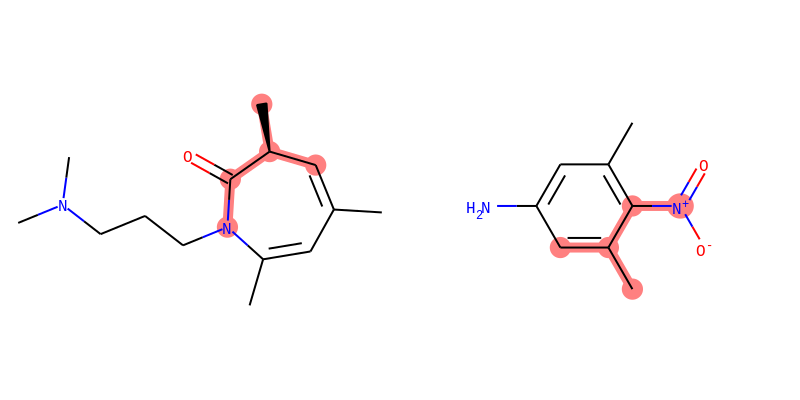

In [ ]:
Draw.MolsToGridImage(
    [query_mol, mol], 
    molsPerRow=2, 
    subImgSize=(400,400), 
    highlightAtomLists=[mcs1, mcs2]
    )

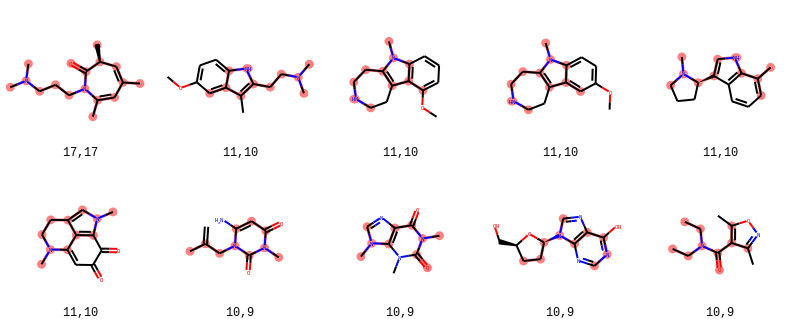

In [ ]:
# 最大共通部分構造の大きさに基づいた類似性検索

mols = []
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile) # SMILES　を　RDKit Mol　に変換
    mol.SetProp("_Name", str(id)) # 名前をつける
    mols.append(mol)

results = []
for i, mol in enumerate(mols):
    mcs = rdFMCS.FindMCS([query_mol, mol], timeout=60)
    results.append([mcs.numAtoms, mcs.numBonds, i])

searched_mols = []
similarity_values = []
highlight_atom_lists = []
for n_atom, n_bond, i in reversed(sorted(results)):
    searched_mols.append(mols[i])
    similarity_values.append(str(n_atom) + "," + str(n_bond))
    mcs = rdFMCS.FindMCS([query_mol, mols[i]], timeout=60)
    mol_mcs = Chem.MolFromSmarts(mcs.smartsString)
    mcs2 = mols[i].GetSubstructMatch(mol_mcs)
    highlight_atom_lists.append(mcs2)

x_start = 0 # 表示したい最初の化合物
x_end = 10 # 表示したい最後の化合物の次
Draw.MolsToGridImage(
    searched_mols[x_start:x_end], # スライスで範囲を指定
    molsPerRow=5, # 列の数
    subImgSize=(160, 160), # 画像サイズ
    highlightAtomLists=highlight_atom_lists[x_start:x_end],
    legends=similarity_values # 注釈
             )